# Spektren zu SR-EELS von Si

Die Spektren wurden aus den SR-EELS Aufnahmen erstellt, die als Superposition am Anfang von Kapitel 2 zu sehen sind.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir

## Vorbereiten der Daten

Aus den SR-EELS Aufnahmen wurden mit EFTEMj-EELS Spektren erzeugt und als xls-Dateien gespeichert. Die Spektren besitzen eine Nummerierung, die der Reihenfolge bei der Messung entspricht. Für den Vergleich wird die Reihenfolge in der Superposition betrachtet. Ein Dictionary wird verwendet um die entsprechende Position zuzuweisen. Pos. 1 entspricht dabei dem obersten SR-EEL Spektrum und Pos. 7 dem untersten SR-EEL Spektrum.

In [2]:
data_path = 'data/Superposition_Spektren/'
spectra = {}
pos_mapping = {
    'Spec1': 'Pos. 4',
    'Spec3': 'Pos. 5',
    'Spec5': 'Pos. 6',
    'Spec7': 'Pos. 7',
    'Spec11': 'Pos. 3',
    'Spec13': 'Pos. 2',
    'Spec15': 'Pos. 1'
}
for file in listdir(data_path):
    file_name = file.split('.')[0]
    assert file_name in pos_mapping.keys()
    label = pos_mapping[file_name]
    spectra[label] = pd.read_csv(os.path.join(data_path, file), sep='\t')

## Das gesamte Spektrum

Betrachten wir das Energieverlustintervall von 36eV bis 161eV, so kann man zwischen den 7 Spektren nur einen leichten Unterschied in den Intensitäten erkennen. Die Position der Maxima scheint identisch zu sein.

36.613 161.347


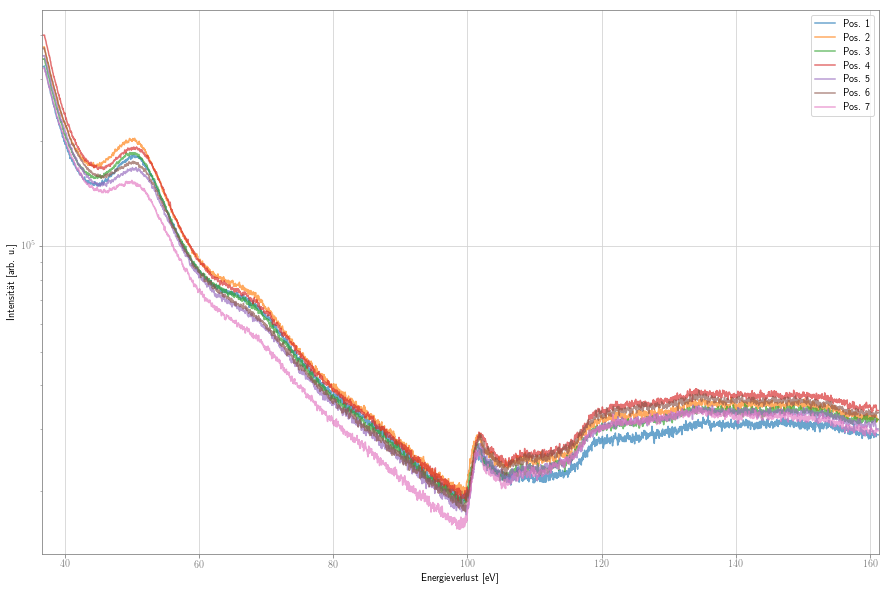

In [3]:
plt.figure(figsize=(15, 10))
plt.xlabel('Energieverlust [eV]')
x_min, x_max = spectra['Pos. 1'].X.min(), spectra['Pos. 1'].X.max()
print(x_min, x_max)
plt.xlim(x_min, x_max)
plt.ylabel('Intensität [arb. u.]')
plt.yscale('log')

for key in sorted(spectra.keys()):
    spec = spectra[key]
    plt.plot(spec.X, spec.Y, label=key, alpha=0.66)
plt.legend(loc='upper right')
plt.show()

## Vergleich der L-Kante von Si

Betrachten wir nur das 8eV-Intervall um die L-Kante von Si, so unterscheiden sich die Spektren minimal. Um die Verschiebung der Kante besser beurteilen zu können, wird die Intensität auf den Untergrund vor der Kante normiert.

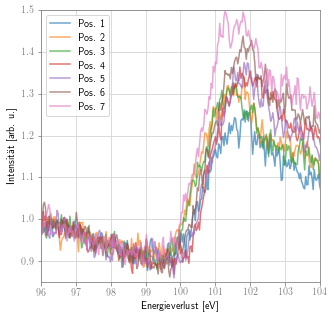

In [4]:
plt.figure(figsize=(5, 5))
plt.xlabel('Energieverlust [eV]')
plt.xlim(96, 104)
plt.ylabel('Intensität [arb. u.]')
plt.ylim(0.85, 1.5)

for key in sorted(spectra.keys()):
    spec = spectra[key]
    y1 = spec.Y / spec.Y[abs(spec.X - 96) <= 2].mean()
    plt.plot(spec.X, y1, label=key, alpha=0.66)
plt.legend(loc='upper left')
plt.savefig('Bilder/SR-EELS_Superposition_Spektren.pdf')
plt.show()